# Generate the Pretrained Model
This notebook uses the pre-trained [micro_speech](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/lite/micro/examples/micro_speech) example for [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview) 20 kB [Simple Audio Recognition](https://www.tensorflow.org/tutorials/sequences/audio_recognition) model to recognize keywords! This Colab follows from the end of the [Course 2 Colab](https://colab.research.google.com/github/tinyMLx/colabs/blob/master/3-5-13-PretrainedModel.ipynb) which converted the model into a TFLite file. In this Colab you will convert that TFLite file into a TFLite Micro file which can be uploaded to your microcontroller using the Arduino IDE.

### Load the pretrained Tensorflow Lite model
Run the below cell to dowload the staff's copy of the pretrained ```.tflite``` file for the "yes,no" KWS model from Course 2.

In [1]:
!wget --no-check-certificate --content-disposition https://github.com/tinyMLx/colabs/blob/master/KWS_yes_no.tflite?raw=true

--2021-03-30 07:24:59--  https://github.com/tinyMLx/colabs/blob/master/KWS_yes_no.tflite?raw=true
Resolving github.com (github.com)... 13.234.210.38
Connecting to github.com (github.com)|13.234.210.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tinyMLx/colabs/raw/master/KWS_yes_no.tflite [following]
--2021-03-30 07:24:59--  https://github.com/tinyMLx/colabs/raw/master/KWS_yes_no.tflite
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tinyMLx/colabs/master/KWS_yes_no.tflite [following]
--2021-03-30 07:25:00--  https://raw.githubusercontent.com/tinyMLx/colabs/master/KWS_yes_no.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 

### Generate a TensorFlow Lite for Microcontrollers Model
To convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers on Arduino we simply need to use the ```xxd``` tool to convert the ```.tflite``` file into a ```.cc``` file.

In [2]:
!apt-get update && apt-get -qq install xxd

Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)


In [3]:
MODEL_TFLITE = 'KWS_yes_no.tflite'
MODEL_TFLITE_MICRO = 'KWS_yes_no.cc'
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

That's it! You've successfully converted your TensorFlow Lite model into a TensorFlow Lite for Microcontrollers model! Run the cell below to print out its contents which we'll need for our next step, deploying the model using the Arudino IDE! **So don't close this Colab as we'll use the model printout in the next step of the deployment to the Arduino IDE!**

In [4]:
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x94, 0x48, 0x00, 0x00, 0x34, 0x42, 0x00, 0x00,
  0x1c, 0x42, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x0b, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x0c, 0x00, 0x00, 0x00, 0xd4, 0x41, 0x00, 0x00,
  0xb4, 0x41, 0x00, 0x00, 0x24, 0x03, 0x00, 0x00, 0xf4, 0x02, 0x00, 0x00,
  0xec, 0x02, 0x00, 0x00, 0xe4, 0x02, 0x00, 0x00, 0xc4, 0x02, 0x00, 0x00,
  0xbc, 0x02, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x1c, 0x

If you'd like to download your model for safekeeping:
1. On the left of the UI click on the folder icon
2. Click on the three dots to the right of the ```KWS_yes_no.cc``` file and select download

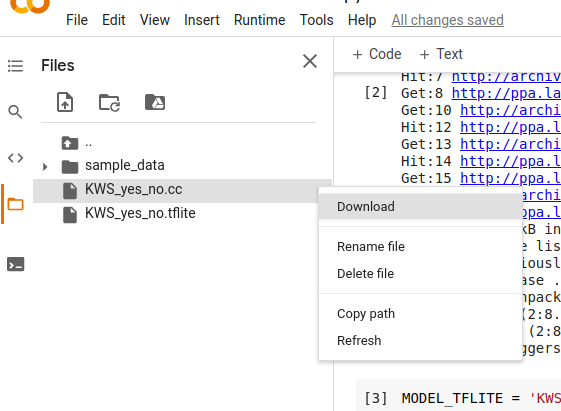